In [7]:
import torch
import pandas as pd
import os
import sys
import numpy as np
import gym
from collections import defaultdict

dir_path = os.path.dirname(os.path.realpath('__file__'))
parent_dir = f"../src"
sys.path.insert(0, parent_dir) 

from QNetwork import QNetwork
from utils import load_trajectories, load_model, store_trajectories
from replay import play_trajectory, play_episodes

env_name = 'MountainCar-v0'
env = gym.envs.make(env_name)
discount_factor = 0.99

dir = f"{dir_path}/../data/{env_name}"

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [8]:
df = load_trajectories(env_name)
df.sort_values('episode_length').head()

,env_name,env_params,episode_length,max_reward,seed,sum_discounted_reward,sum_reward,trajectory
495,MountainCar-v0,None,87,-1.0,495,-58.287912,-87.0,"[([-0.4024656009849641, 0.0], 0, -1.0, [-0.404..."
478,MountainCar-v0,None,87,-1.0,478,-58.287912,-87.0,"[([-0.40035870598310025, 0.0], 0, -1.0, [-0.40..."
429,MountainCar-v0,None,92,-1.0,429,-60.332219,-92.0,"[([-0.400928104015099, 0.0], 0, -1.0, [-0.4028..."
462,MountainCar-v0,None,92,-1.0,462,-60.332219,-92.0,"[([-0.4049485509495422, 0.0], 1, -1.0, [-0.405..."
416,MountainCar-v0,None,94,-1.0,416,-61.121608,-94.0,"[([-0.41048496714510657, 0.0], 0, -1.0, [-0.41..."


In [9]:
episode_lengths = list(df.episode_length.sort_values())
min_len = min(episode_lengths)
max_len = max(episode_lengths)

step = (max_len - min_len) // 4
selected_trajectories = []
for val in range(min_len, max_len, step):
    closest_episode_length = min(episode_lengths, key=lambda x:abs(x - val))
    trajectory_row = df[df.episode_length == closest_episode_length].iloc[0]
    selected_trajectories.append((trajectory_row.trajectory, trajectory_row.seed))
trajectory_row = df[df.episode_length == 199].iloc[0]
selected_trajectories.append((trajectory_row.trajectory, trajectory_row.seed))

store_trajectories(env_name, selected_trajectories, env_params=None, discount=discount_factor,  filename='selected_trajectories')

In [10]:
selected_trajectories = load_trajectories(env_name, filename='selected_trajectories')
print(selected_trajectories)

         env_name env_params  episode_length  max_reward  seed  \
0  MountainCar-v0       None              87        -1.0   478   
1  MountainCar-v0       None             113        -1.0   497   
2  MountainCar-v0       None             150        -1.0   452   
3  MountainCar-v0       None             171        -1.0   260   
4  MountainCar-v0       None             199        -1.0   378   
5  MountainCar-v0       None             199        -1.0   378   

   sum_discounted_reward  sum_reward  \
0             -58.287912       -87.0   
1             -67.879893      -113.0   
2             -77.854821      -150.0   
3             -82.068432      -171.0   
4             -86.466700      -199.0   
5             -86.466700      -199.0   

                                          trajectory  
0  [([-0.40035870598310025, 0.0], 0, -1.0, [-0.40...  
1  [([-0.42109250560191724, 0.0], 0, -1.0, [-0.42...  
2  [([-0.5182939385094532, 0.0], 0, -1.0, [-0.519...  
3  [([-0.4100812117308062, 0.0], 0, 

In [11]:
model = load_model(env_name)
model

PolynomialNetwork(
  (l1): Linear(in_features=6, out_features=3, bias=True)
)

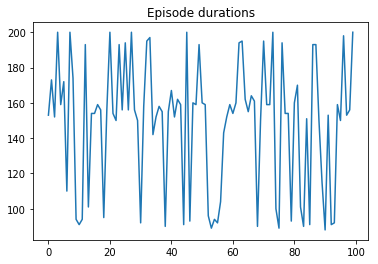

In [12]:
play_episodes(env, model, n=100, render=False)